In [1]:
import torch
from flamby.datasets.fed_heart_disease import FedHeartDisease

def load_data(client_index: int):
    train_dataset = FedHeartDisease(center=client_index, train=True)
    test_dataset = FedHeartDisease(train=False)
    trainloader = DataLoader(train_dataset, batch_size=PARAMS["batch_size"])
    testloader = DataLoader(test_dataset, batch_size=PARAMS["batch_size"])
    sample_rate = PARAMS["batch_size"] / len(train_dataset)
    return trainloader, testloader, sample_rate

['/home/dgxuser16/anaconda3/envs/ihpc/lib/python38.zip', '/home/dgxuser16/anaconda3/envs/ihpc/lib/python3.8', '/home/dgxuser16/anaconda3/envs/ihpc/lib/python3.8/lib-dynload', '', '/home/dgxuser16/.local/lib/python3.8/site-packages', '/home/dgxuser16/anaconda3/envs/ihpc/lib/python3.8/site-packages', '/raid/home/dgxuser16/NTL/mccarthy/ahmad/github/adaptive_privacy_fl/without_dp']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample Rate: 0.04020100502512563
Number of Batches in Train DataLoader: 25
Number of Batches in Test DataLoader: 13
Train Dataset - Labels: [[1.0], [0.0]]
Image Sizes: [torch.Size([13]), torch.Size([13])]


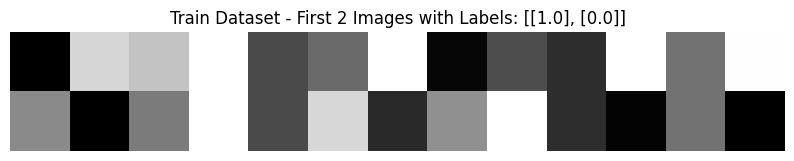

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Dataset - Labels: [[0.0]]
Image Sizes: [torch.Size([13])]


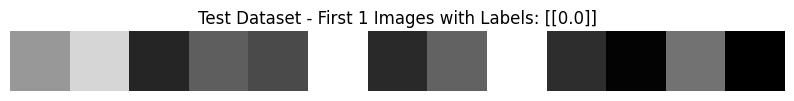

In [9]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Import the FedHeartDisease dataset
from flamby.datasets.fed_heart_disease import FedHeartDisease

# Define parameters
PARAMS = {
    "batch_size": 8,  # Adjust as needed
    # Add other parameters if necessary
}

def load_data(client_index: int):
    """
    Load training and testing data for a given client index.

    Args:
        client_index (int): The index of the client.

    Returns:
        tuple: (trainloader, testloader, sample_rate)
    """
    # Initialize the datasets
    train_dataset = FedHeartDisease(center=client_index, train=True)
    test_dataset = FedHeartDisease(train=False)

    
    
    # Create DataLoaders
    trainloader = DataLoader(train_dataset, batch_size=PARAMS["batch_size"], shuffle=True)
    testloader = DataLoader(test_dataset, batch_size=PARAMS["batch_size"], shuffle=False)
    
    # Calculate sample rate (optional, based on your original code)
    sample_rate = PARAMS["batch_size"] / len(train_dataset)
    
    return trainloader, testloader, sample_rate

def imshow(img, title=None):
    """
    Display a tensor as an image.

    Args:
        img (Tensor): Image tensor.
        title (str, optional): Title of the image. Defaults to None.
    """
    img = img / 2 + 0.5  # Unnormalize if images were normalized
    npimg = img.numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

def display_images(loader, dataset_type="Train", num_images=10):
    """
    Display a specified number of images from a DataLoader.

    Args:
        loader (DataLoader): DataLoader to fetch images from.
        dataset_type (str, optional): Type of dataset ("Train" or "Test"). Defaults to "Train".
        num_images (int, optional): Number of images to display. Defaults to 10.
    """
    data_iter = iter(loader)
    images, labels = next(data_iter)
    
    # Print labels and size of each image
    print(f"{dataset_type} Dataset - Labels: {labels[:num_images].tolist()}")
    print(f"Image Sizes: {[img.size() for img in images[:num_images]]}")
    
    # Check if the dataset returns images and labels
    if isinstance(images, torch.Tensor):
        # Select the first `num_images` images
        images_to_show = images[:num_images]
        
        # Create a grid of images
        grid = torchvision.utils.make_grid(images_to_show, nrow=5)
        
        # Display the images
        imshow(grid, title=f"{dataset_type} Dataset - First {num_images} Images with Labels: {labels[:num_images].tolist()}")
    else:
        print(f"The {dataset_type} dataset does not contain image data.")


def main():
    # Specify the client index (adjust as needed)
    client_index = 0
    
    # Load the data
    trainloader, testloader, sample_rate = load_data(client_index)

    print(f"Sample Rate: {sample_rate}")
    print(f"Number of Batches in Train DataLoader: {len(trainloader)}")
    print(f"Number of Batches in Test DataLoader: {len(testloader)}")
    
    # Display images from the training dataset
    display_images(trainloader, dataset_type="Train", num_images=2)
    
    # Display images from the testing dataset
    display_images(testloader, dataset_type="Test", num_images=1)

if __name__ == "__main__":
    main()